# LSNA Example
This notebook is an example of how to preform an LSNA calibration using pyMez and the Microwave uncertainty framework

1. Power Calibration. The power calibration requires the measurement of a power meter at different frequencies, its reflection coefficient, and the measurement of the a's and b's for the VNA. In addition, a file with the power meters calibrated response is desired. For this example we will use the ZVA67 as the VNA, the Rhode&Scharz NRP power meter with the NRP-Z57 as the detector.
2. Harmonic Phase Reference. The harmonic phase reference calibration requires the measurement of a comb (serial #), its reflection coefficient and its calibration file.
3. Linear S-parameter calibration. This requires a calibration using one of the many Sparameter calibration techniques. The linear Sparameter calibration is performed on a set of wnp files that record the receiver values directly.
4. DUT measurement. DUT's are measured by setting a signal to the desired configuration and measuring wnp file.

In [2]:
# import the pyMez package (renamed 01/01/2018)
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 3.149 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.532 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 9.645 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.01 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.33 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.032 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.711 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.029 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.022 s to import Code.Utils.Names
It took 15.461 s to import all of the active modules


In [1]:
# This is the configuration setting for the calibration
vna_address="GPIB::20"
power_meter_address="GPIB::14"
vna_frequency_start=200*10**6
vna_frequency_stop=50*10**9
vna_frequency_number_points=101
vna_sweep_type="LIN"
vna_IFBW=1000
vna_power=-10
vna_power_correction="OFF"
vna_correction="OFF"
power_meter_units="W"
power_meter_function="POW:AVG"
measurement_delay=2/vna_IFBW
port=1
data_directory=""


In [3]:
# create the instrument visa classes
vna=VNA(vna_address)
power_meter=NRPPowerMeter(power_meter_address)

In [4]:
# we can check the states if the instrument sheets are defined and located in pyMez/Instruments
print vna.get_state()
print power_meter.get_state()
# to save these states as an xml we use vna.save_state(path_to_save) and we can load them using vna.load_state

{'SENS:AVER': u'0', 'SENS:BAND': u'10', 'SOUR:POW': u'-3', 'SENS:SWE:TYPE': u'POIN', 'SOUR:POW:CORR:STAT': u'0', 'SOUR:POW:SLOP': u'0', 'SENS:CORR:STAT': u'1'}
{'SENS:FUNC': u'"POW:AVG"', 'UNIT:POW': u'W'}


## Power Calibration
We first measure the gamma of the power meter in S11 of an s2p. Then we set the instrument into a point state and measure both a w1p and a power reading file. This is used in conjunction with a calibration file. 

In [5]:
# now we set up the frequency list for the ZVA and save it.
# Options are start, stop, number_points, type, step,etc..
# Default is start, stop, number_points
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)

In [8]:
frequency_list=vna.get_frequency_list()

In [9]:
print frequency_list

[200000000.0, 698000000.0, 1196000000.0, 1694000000.0, 2192000000.0, 2690000000.0, 3188000000.0, 3686000000.0, 4184000000.0, 4682000000.0, 5180000000.0, 5678000000.0, 6176000000.0, 6674000000.0, 7172000000.0, 7670000000.0, 8168000000.0, 8666000000.0, 9164000000.0, 9662000000.0, 10160000000.0, 10658000000.0, 11156000000.0, 11654000000.0, 12152000000.0, 12650000000.0, 13148000000.0, 13646000000.0, 14144000000.0, 14642000000.0, 15140000000.0, 15638000000.0, 16136000000.0, 16634000000.0, 17132000000.0, 17630000000.0, 18128000000.0, 18626000000.0, 19124000000.0, 19622000000.0, 20120000000.0, 20618000000.0, 21116000000.0, 21614000000.0, 22112000000.0, 22610000000.0, 23108000000.0, 23606000000.0, 24104000000.0, 24602000000.0, 25100000000.0, 25598000000.0, 26096000000.0, 26594000000.0, 27092000000.0, 27590000000.0, 28088000000.0, 28586000000.0, 29084000000.0, 29582000000.0, 30080000000.0, 30578000000.0, 31076000000.0, 31574000000.0, 32072000000.0, 32570000000.0, 33068000000.0, 33566000000.0, 3

In [10]:
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)

In [54]:
# now we set the power in dB
vna.set_power(vna_power)

In [11]:
# we turn off the corrections
# todo: add this to class VNA as set_power_correction, set_correction 
#vna.write("SOUR:POW:CORR:STAT {0}".format(vna_power_correction))
vna.write("SENS:CORR:STAT {0}".format(vna_correction))

(20L, <StatusCode.success: 0>)

1.85 mm female-female adapter, flat is 1/4"

In [13]:
# now we measure a s2p with the first port as the reflection coefficient of the power meter
vna.initialize()
power_meter_gamma=vna.measure_sparameters()

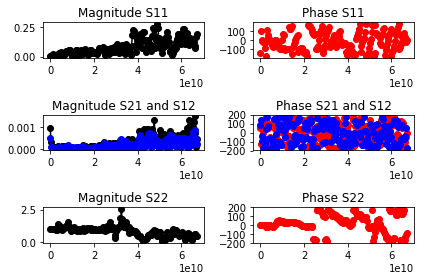

In [14]:
power_meter_gamma.show();

In [15]:
# now we measure the power meter reading and the w1p of port 1 at the same time
# to do this we set one port wave parameters on the vna, intialize the state of the power meter, put the vna in CW mode
# sweep through the frequency list and then put it back into the previous state
vna.initialize_w1p()

In [16]:
# power meter units
power_meter.write("UNIT:POW {0}".format(power_meter_units))

(12L, <StatusCode.success: 0>)

In [17]:
power_meter.write("SENS:FREQ {0}".format(3*10**9))

(22L, <StatusCode.success: 0>)

In [18]:

# select the sweep type 
vna.write('SWEEP:TYPE POINT')
# set the number of points to 1
vna.write('SWEEP:POINTS 1')
# set the trigger to single
vna.write("INITiate:CONTinuous OFF")

(25L, <StatusCode.success: 0>)

In [19]:
wparameter_data = []
power_data=[]
total_data=[]
for frequency in frequency_list:
    # set the frequency
    vna.write("SOUR1:FREQ{0} {1}".format(port,frequency))
    power_meter.write("SENS:FREQ {0}".format(frequency))
    # trigger the vna
    vna.write("ABORT;INITiate:IMMediate;*wai")
    reading_delay=.2
    time.sleep(reading_delay)
    power_meter.write("INIT")
    time.sleep(reading_delay)
    power_meter_reading=float(power_meter.query("FETCh?").replace("\n", ""))
    time.sleep(measurement_delay)
    # Set the format to ascii and set up sweep definitions
    vna.write('FORM:ASC,0')
    # First get the A and Blists
    vna.write('CALC:PAR:SEL A{0}_D{0}'.format(port))
    vna.write('CALC:FORM MLIN')
    while vna.is_busy():
        time.sleep(.01)
    a_string = vna.query('CALC:DATA? SDATA')
    vna.write('CALC:PAR:SEL  B{0}_D{0}'.format(port))
    vna.write('CALC:FORM MLIN')
    while vna.is_busy():
        time.sleep(.01)
    b_string = vna.query('CALC:DATA? SDATA')
    # String Parsing
    a_list = a_string.replace("\n", "").split(",")
    b_list = b_string.replace("\n", "").split(",")
    # Construct a list of lists that is data in RI format
    re_a = a_list[0]
    im_a = a_list[1]
    re_b = b_list[0]
    im_b = b_list[1]
    new_row = [frequency / 10. ** 9,
               re_a, im_a,
               re_b, im_b]
    #print(new_row)
    new_row = map(lambda x: float(x), new_row)
    new_total_row = [frequency / 10. ** 9,power_meter_reading,
               re_a, im_a,
               re_b, im_b]
    new_total_row = map(lambda x: float(x), new_total_row)
    new_total_row=new_total_row+[datetime.datetime.utcnow()]
    wparameter_data.append(new_row)
    power_data.append([frequency / 10. ** 9,
               power_meter_reading])
    total_data.append(new_total_row)
    
column_names = ["Frequency", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1"]
power_column_names=["Frequency","Power"]
total_column_names=["Frequency","Power", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1","Date"]
# add some options here about auto saving
# do we want comment options?
w1_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": column_names,
                   "data": wparameter_data, "specific_descriptor": "Wave_Parameters",
                   "general_descriptor": "One_Port", "extension": "w1p"}
power_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": power_column_names,
                   "data": power_data, "specific_descriptor": "Power",
                   "general_descriptor": "One_Port", "extension": "txt"}
total_options = { "column_names": total_column_names,
                   "data": total_data, "specific_descriptor": "Power_Cal",
                   "general_descriptor": "One_Port", "extension": "txt"}
w1p = AsciiDataTable(None, **w1_options)
power=AsciiDataTable(None, **power_options) 
total=AsciiDataTable(None, **total_options) 
              

## Harmonic Phase Reference Measurement
To measure the harmonic phase reference we need a gamma and a measurement of the output with the signal source turned off. The measurement of the values is w1p file. This is used in conjunction with a s2p file were the gamma of the HPR is in S11 and a calibration file. 

In [ ]:
# measure gamma of the HPR
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)
# now we set the power in dB
vna.set_power(vna_power)

In [ ]:
vna.initialize()
hpr_gamma=vna.measure_sparameters()

In [ ]:
# Again this is done in point mode
# select the sweep type 
vna.write('SWEEP:TYPE POINT')
# set the number of points to 1
vna.write('SWEEP:POINTS 1')
# set the trigger to single
vna.write("INITiate:CONTinuous OFF")

In [ ]:
wparameter_data = []
for frequency in frequency_list:
    # set the frequency
    vna.write("SOUR1:FREQ{0} {1}".format(port,frequency))
    #make sure the power is off
    vna.write('SOUR1:POW{0}:STAT OFF'.format(port)
    # trigger the vna
    vna.write("ABORT;INITiate:IMMediate;*wai")
    time.sleep(measurement_delay)
    # Set the format to ascii and set up sweep definitions
    vna.write('FORM:ASC,0')
    # First get the A and Blists
    vna.write('CALC:PAR:SEL A{0}_D{0}'.format(port))
    vna.write('CALC:FORM MLIN')
    while vna.is_busy():
        time.sleep(.01)
    a_string = vna.query('CALC:DATA? SDATA')
    vna.write('CALC:PAR:SEL  B{0}_D{0}'.format(port))
    vna.write('CALC:FORM MLIN')
    while vna.is_busy():
        time.sleep(.01)
    b_string = vna.query('CALC:DATA? SDATA')
    # String Parsing
    a_list = a_string.replace("\n", "").split(",")
    b_list = b_string.replace("\n", "").split(",")
    # Construct a list of lists that is data in RI format
    re_a = a_list[0]
    im_a = a_list[1]
    re_b = b_list[0]
    im_b = b_list[1]
    new_row = [frequency / 10. ** 9,
               re_a, im_a,
               re_b, im_b]
    #print(new_row)
    new_row = map(lambda x: float(x), new_row)
    wparameter_data.append(new_row)
    
column_names = ["Frequency", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1"]
# add some options here about auto saving
# do we want comment options?
w1_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": column_names,
                   "data": wparameter_data, "specific_descriptor": "Wave_Parameters",
                   "general_descriptor": "One_Port", "extension": "w1p"}

hpr_w1p = AsciiDataTable(None, **w1_options)              

## Standards Measurement For Sparameter Calibration
Now we must measure the standards for the Sparameter calibration. Each standard is attached and then the 2 port wave parameters are measured. 

In [ ]:
# short measurement
# attach the short
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)
# now we set the power in dB
vna.set_power(vna_power)
vna.initialize_w2p()
short_w2p=vna.measure_w2p()


In [ ]:
# open measurement
# attach the open
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)
# now we set the power in dB
vna.set_power(vna_power)
vna.initialize_w2p()
open_w2p=vna.measure_w2p()


In [ ]:
# load measurement
# attach the load
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)
# now we set the power in dB
vna.set_power(vna_power)
vna.initialize_w2p()
load_w2p=vna.measure_w2p()

In [ ]:
# Thru measurement
# attach the thru
vna.set_frequency(start=vna_frequency_start,
                  stop=vna_frequency_stop,
                  number_points=vna_frequency_number_points,
                  type=vna_sweep_type)
# Now we set the IFBW of the vna
vna.set_IFBW(vna_IFBW)
# now we set the power in dB
vna.set_power(vna_power)
vna.initialize_w2p()
thru_w2p=vna.measure_w2p()

In [20]:
power_meter.get_state()

{'SENS:FUNC': u'"POW:AVG"', 'UNIT:POW': u'W'}

In [21]:
power_meter.write("UNIT:POW DBM")

(14L, <StatusCode.success: 0>)

In [7]:
scope=HighSpeedOscope("GPIB0::7")

The information sheet was not found defaulting to address


In [10]:
wave=scope.measure_waves()

IndexError: list index out of range

In [9]:
scope.initialize()

In [ ]:
wave=scope.measure_waves()